# Multiple Linear Regression
## Bike Case Study

#### Problem Statement:

BoomBikes, a U.S. bike-sharing provider, seeks to model post-pandemic bike demand by identifying significant predictive variables to inform business strategy and meet customer expectations. 

Essentially, the company wants —


- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands


## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [127]:
#Import all the necessary libraries here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as m
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm  

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [3]:
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
#impressions:
## 1. Total number of rows : 730
## 2. Total number of columns : 16

In [6]:
# Check for any duplicate entries
bike.duplicated().sum()

0

In [7]:
#impressions:
## We don't see any duplicate values in the dataset

In [8]:
# check for datatypes
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
#impressions:
# 1. We have just one column with Object data type i.e dteday
# 2. Some categorical fields have numerical data types

In [10]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
#check for columns present in dataset
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
# Check for Nulls
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
# impressions:
# We have no null values present in any column of the dataset

## Step 2: Preparing the Data for Modelling and EDA

### Convert Categorical variables

In [14]:
# The season column in bike rental dataset seems to be a categorical variable with four unique values,  
# 1: spring, 2: summer, 3: fall, 4: winter
# Hence mapping Season to the respective values

In [15]:
bike['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace =True)

In [16]:
# Similarly mapping weekdays to the respective values
# 0: Sunday, 1: Monday, 2: Tuesday, 3: Wednesday, 4: Thursday, 5: Friday, 6: Saturday

In [17]:
bike['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace =True)

In [18]:
# Mapping weathersit with the respective values (from data dictionary)

# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [19]:
bike['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [20]:
# Impressions: 
    # Since 4th category is not present in the dataset, we don't need to map it

In [21]:
bike['weathersit'].replace({1: 'Clear/Partly cloudy', 2: 'Mist/Cloudy', 3: 'Light-Snow/Rain/Storm'}, inplace =True)

In [22]:
bike['mnth']= bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [23]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Saturday,0,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sunday,0,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Monday,1,Clear/Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tuesday,1,Clear/Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wednesday,1,Clear/Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Remove unwanted columns

In [24]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [25]:
# Some of the columns are redundant and an be remove without impacting our analysis :

# instant : Just shows up the index value for each record
# casual & registered : Our target variamble cnt already shows up the sum of casual and registered and hence we can drop these two
# date : Clearly, month and year are separately displayed in other columns (month and yr) We can hence manage without this column

In [26]:
bike.drop(columns=['instant','dteday','casual','registered'],axis=1,inplace=True)

In [27]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Fix Datatype

In [28]:
# Setting up the right datatype for all numerical columns using pd.to_numeric()

bike[['temp', 'atemp', 'hum', 'windspeed','cnt']] = bike[['temp', 'atemp', 'hum', 'windspeed','cnt']].apply(pd.to_numeric)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Visualizing the Numerical variables

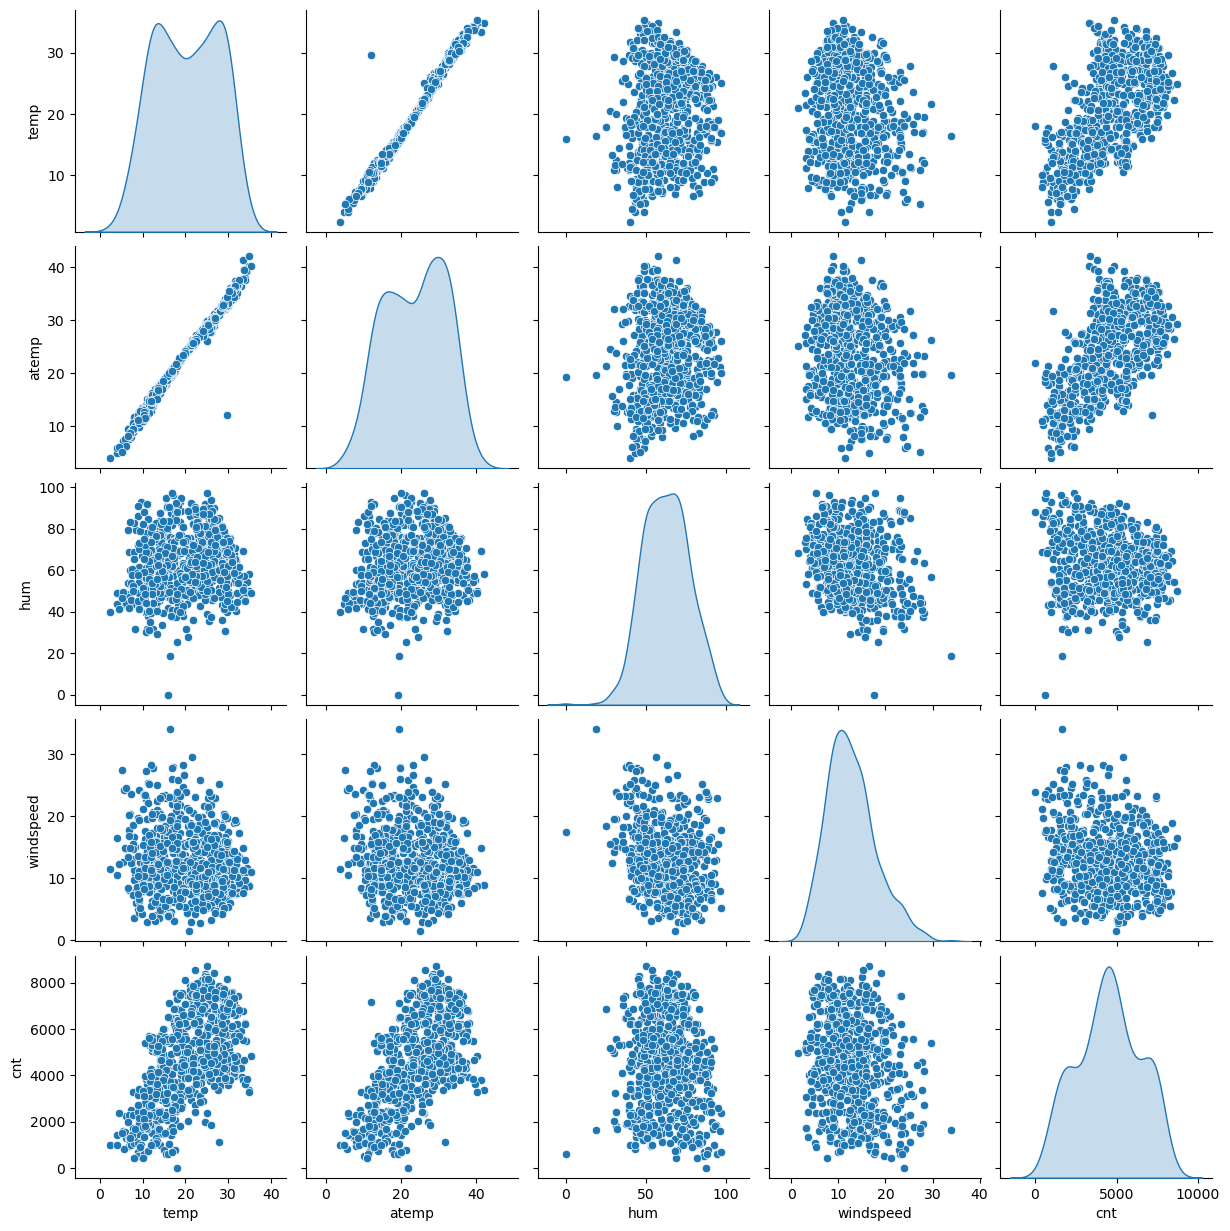

In [29]:
num_vars = bike[['temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(num_vars, diag_kind='kde')
plt.show()

In [30]:
#Impressions: 
# We can see there are two similar fields and exists a linear relationship :
# temp : temperature in Celsius
# atemp: feeling temperature in Celsius
# We can hence drop one of these later while building our model.

### Visualising the Categorical Variables

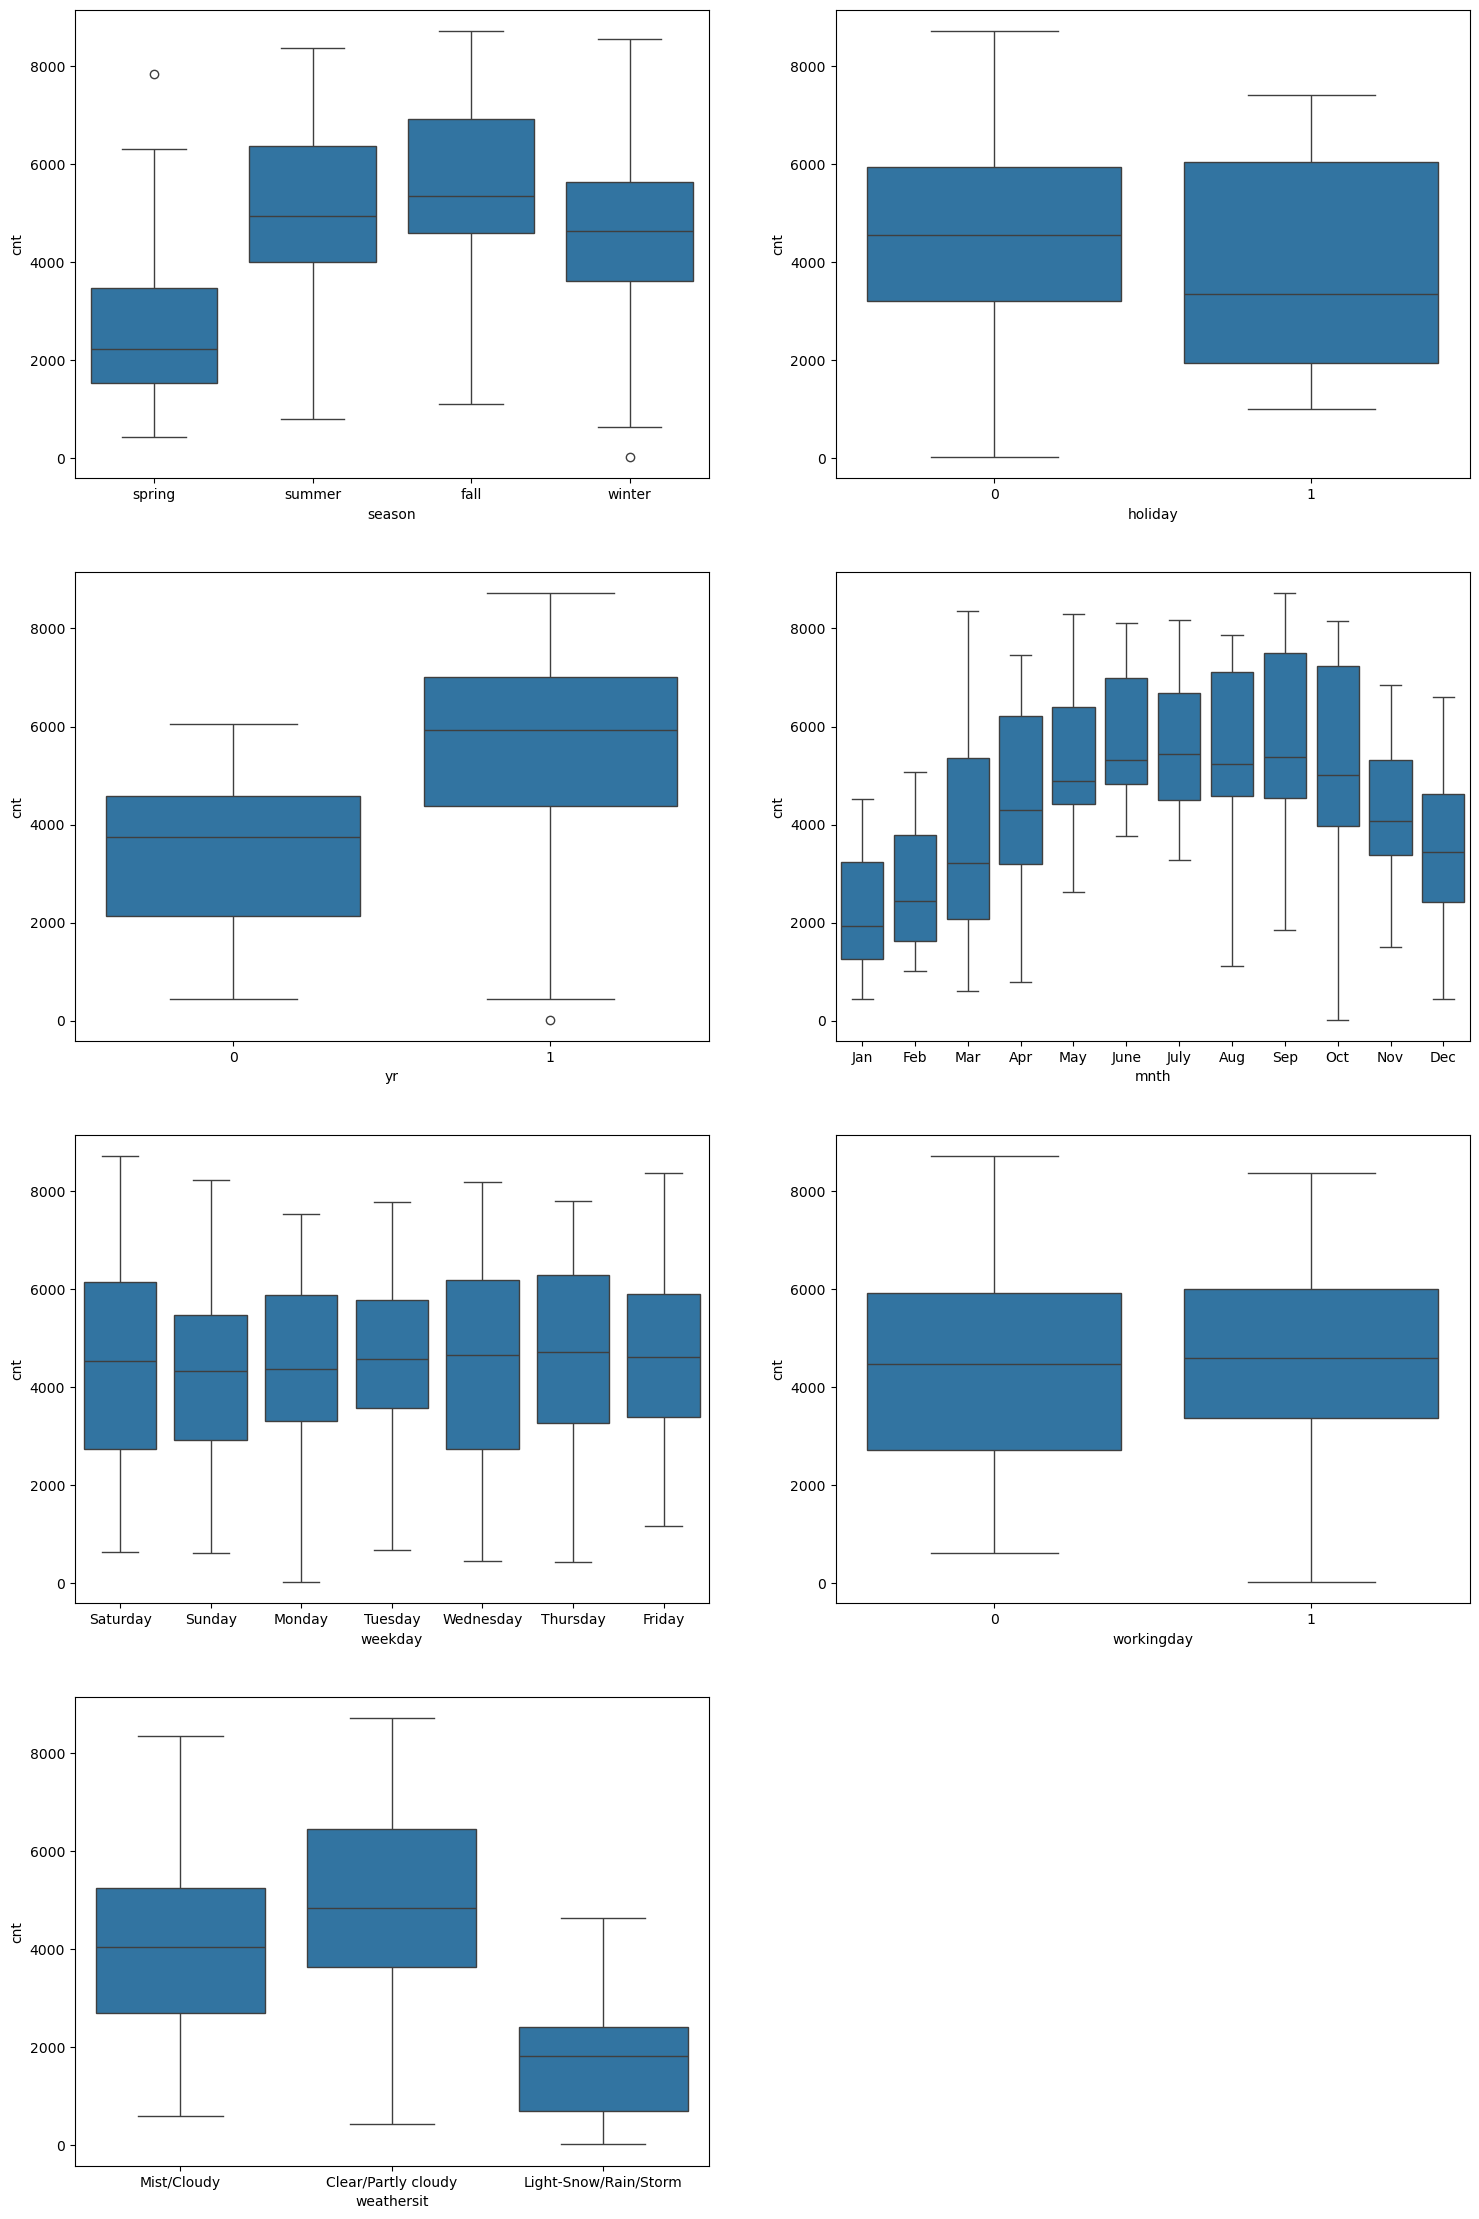

In [31]:
## Use subplots to analyse predictors (categorical variables) against target variable 'cnt' and outliers (if any)

plt.figure(figsize=(18, 28))

plt.subplot(4,2,1)
sns.boxplot(x='season', y='cnt', data= bike)

plt.subplot(4,2,2)
sns.boxplot(x='holiday', y='cnt', data= bike)

plt.subplot(4,2,3)
sns.boxplot(x='yr', y= 'cnt', data= bike)

plt.subplot(4,2,4)
sns.boxplot(x='mnth', y='cnt', data= bike)

plt.subplot(4,2,5)
sns.boxplot(x='weekday', y='cnt', data= bike)

plt.subplot(4,2,6)
sns.boxplot(x='workingday', y='cnt', data= bike)

plt.subplot(4,2,7)
sns.boxplot(x='weathersit', y='cnt', data= bike)

plt.show()

In [32]:
# Impressions: 

# season : One-third (more than 30%) of the bookings were done in fall season and the median lies around 5000, 
# followed by Summer and Winter. Clealry this can serve as a good predictor for our analysis.

# holiday : Majority(~ 97%) of the booking took place when it wasn't a holiday. 
# We have a very high bias here and thus it maynot be a good predctor variable.

# yr : During yr 2019 , we have more number of bookings (almost twice) than yr 2018. 
# Since our analysis will be based only on two years (2018 and 2019), they are important predictors.

# mnth : Distribution of months looks like a normally distributed, with months : 5-9 leading in number of bookings and 
# crossing the median over around 4500-5000. This indeed can serve as a good predictor.

# weekday : No clear pattern observed here as all the days show a similar spread This maynot be able to serve as a good predictor

# workingday : There is no significant difference between the counts on working and non-working days in terms of their distribution 
# and central tendency and thus it maynot be a good predctor variable.

# weathersit : Majority of the bookings took place during a clear/partly cloudy weather with a median at around 
# 5000 followed by misty/cloudy weather, with median 4000. This can also serve as a good predictor.

# Good Indicators : season, yr, mnth, weathersit

In [33]:
# Creating a function to plot graphs
def distribution(data, title, x_label, y_label):
    plt.figure(figsize=(8,5))
    density = sns.barplot(x=data.index, y=data.values)
    title = plt.title(title, fontdict={'fontsize': 20})
    plt.xlabel(x_label)
    plt.ylabel(y_label)
plt.show()

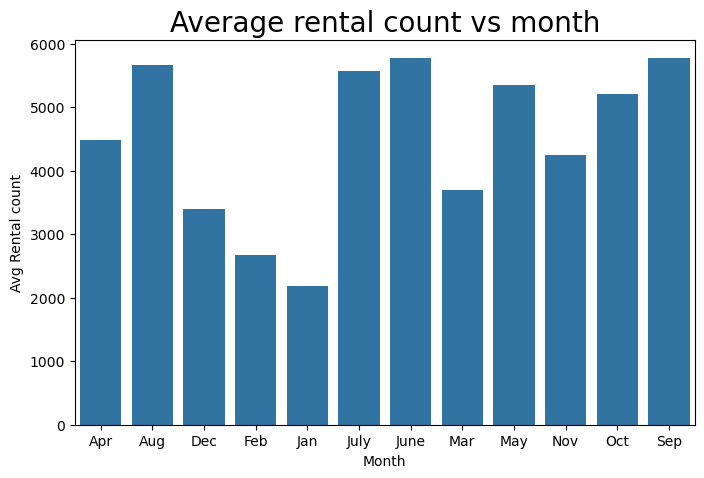

In [34]:
#month vs rental count
dist1 = bike.groupby(by= 'mnth').cnt.mean()
distribution(data=dist1, title = 'Average rental count vs month', x_label = 'Month', y_label='Avg Rental count')

In [35]:
# Impressions: 

# Highest rental counts during June-Sept (fall season) and lowest during Dec-Feb (extreme weather)

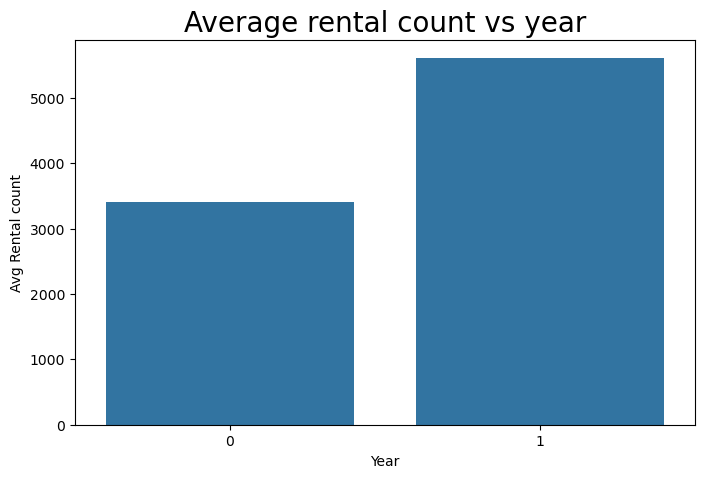

In [36]:
#year vs rental count
dist2 = bike.groupby(by='yr').cnt.mean()
distribution(data=dist2, title = 'Average rental count vs year', x_label = 'Year', y_label='Avg Rental count')

In [37]:
# Impressions: 

# Rental counts are twice for year 2019 as compared to year 2018

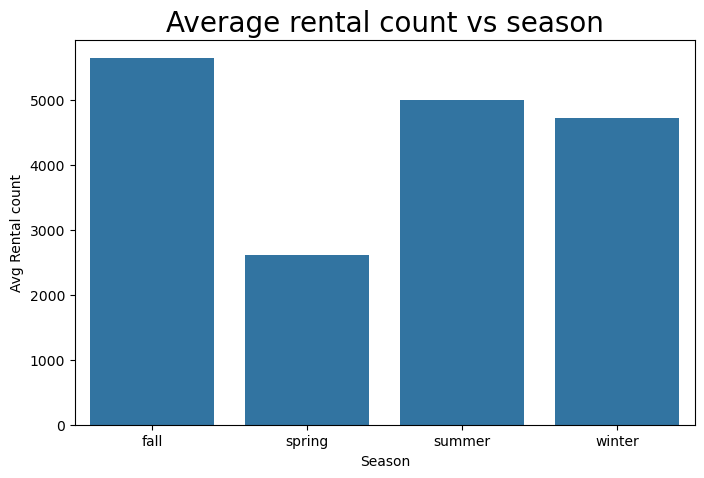

In [38]:
# season vs rental count
dist1 = bike.groupby(by='season').cnt.mean()
distribution(data=dist1, title = 'Average rental count vs season', x_label = 'Season', y_label='Avg Rental count')

In [39]:
# Impressions: 

# Highest rental counts during fall season and lowest during spring season

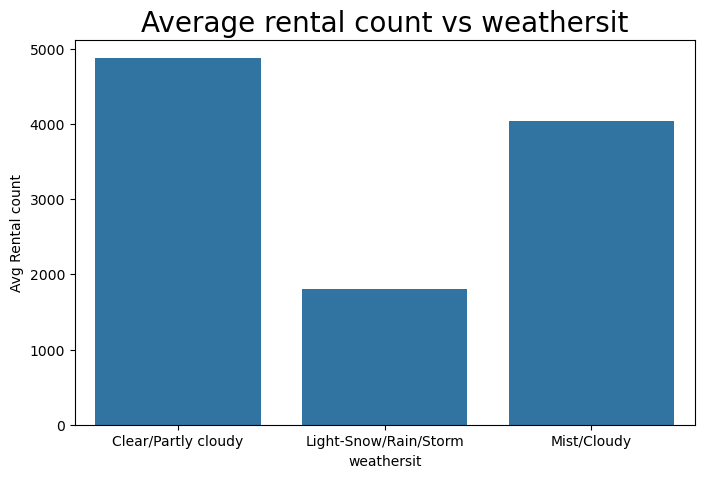

In [40]:
# weathersit vs rental count
dist2 = bike.groupby(by='weathersit').cnt.mean()
distribution(data=dist2, title = 'Average rental count vs weathersit', x_label = 'weathersit', y_label='Avg Rental count')

In [41]:
# Impressions: 
# Highest rental counts during weather pattern clear/partly cloudy and lowest during light snow/rain/storm

### Creating Dummy Variables for mnth, weathersit, season, weekday

In [42]:
mnth_indicators = pd.get_dummies(bike['mnth'], drop_first=True).astype(int)
weathersit_indicators = pd.get_dummies(bike['weathersit'], drop_first=True).astype(int)
season_indicators = pd.get_dummies(bike['season'], drop_first=True).astype(int)
weekday_indicators = pd.get_dummies(bike['weekday'], drop_first=True).astype(int)

# Adding indicator variable columns to the dataset and dropping original columns
bike = pd.concat([bike, season_indicators, mnth_indicators, weekday_indicators, weathersit_indicators], axis=1)
bike = bike.drop(columns=['season', 'mnth', 'weekday', 'weathersit'])

bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light-Snow/Rain/Storm,Mist/Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   spring                 730 non-null    int32  
 9   summer                 730 non-null    int32  
 10  winter                 730 non-null    int32  
 11  Aug                    730 non-null    int32  
 12  Dec                    730 non-null    int32  
 13  Feb                    730 non-null    int32  
 14  Jan                    730 non-null    int32  
 15  July  

#### Splitting Data into Train and Test

In [44]:
# Splitting the data set in the two parts using train_test_split method from SKLEARN library in the ratio of 75:25

# TRAIN : 80%
# TEST : 20%

In [45]:
# using random.seed() from numpy to implement this.

np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.80, test_size = 0.20, random_state = 111)

In [46]:
bike_train.shape

(584, 30)

In [47]:
bike_test.shape

(146, 30)

In [48]:
# Impressions: 

# 80% Train Data is 584
# 20% Test Data is 146

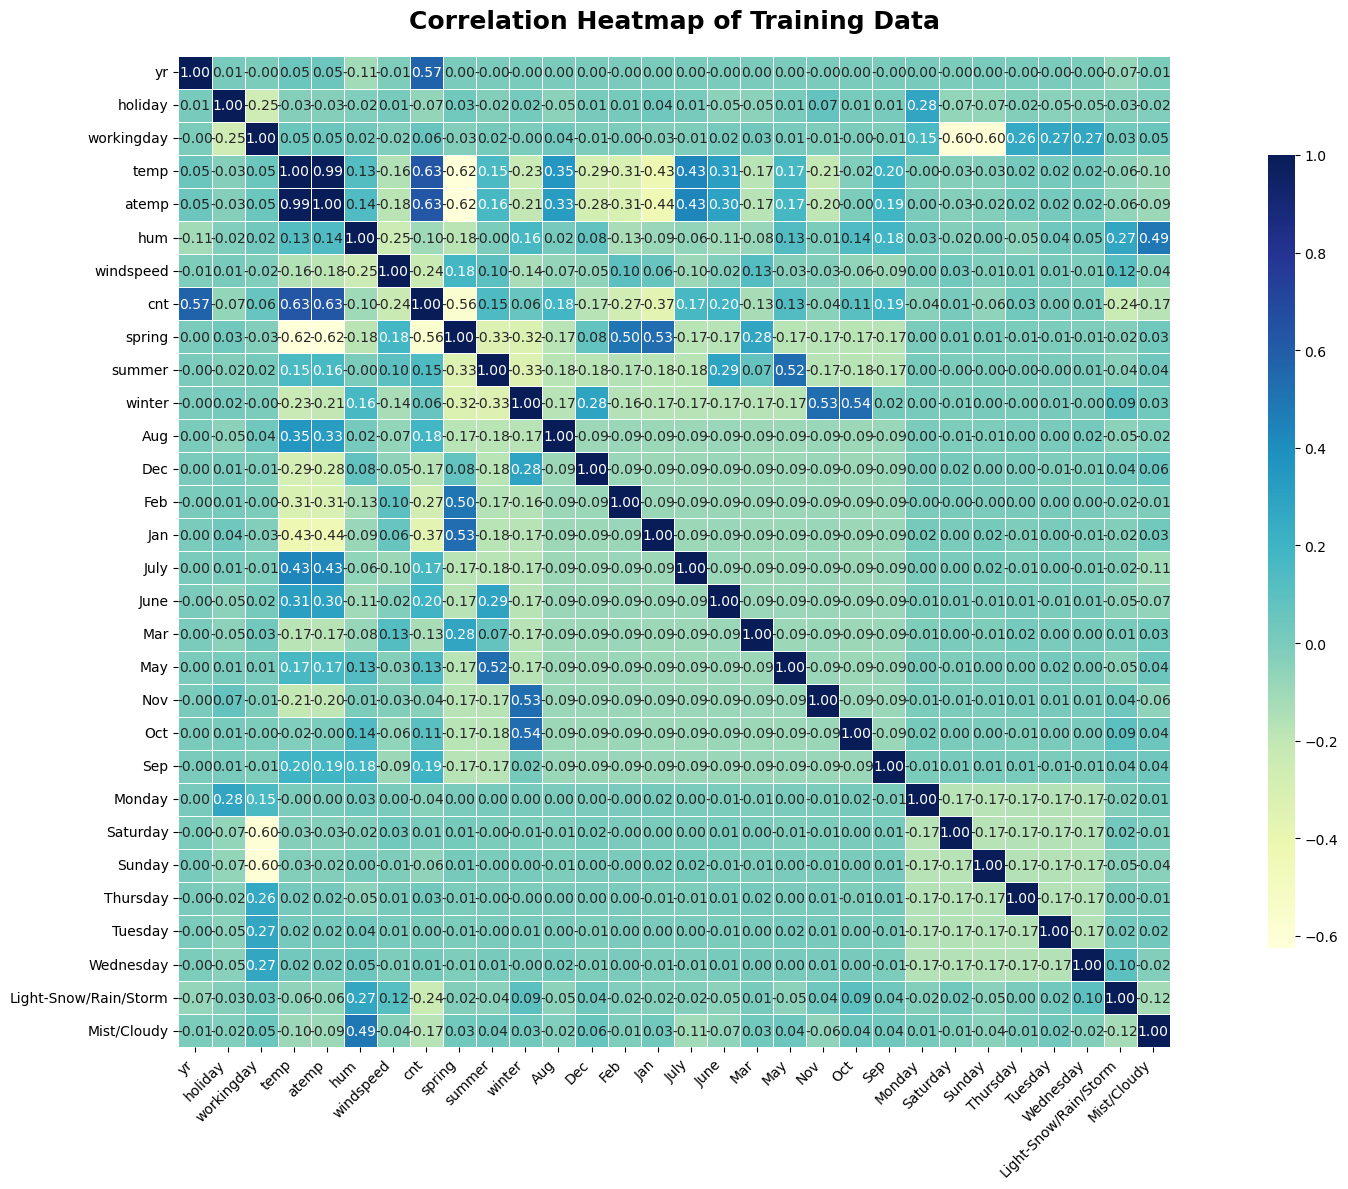

In [49]:
plt.figure(figsize=(20, 12))  # Reduced size to be visually proportional
sns.heatmap(
    bike.corr(),
    annot=True,
    fmt=".2f",  # Format annotations to two decimal places
    cmap="YlGnBu",  # Changed colormap to a more professional gradient
    linewidths=0.5,  # Added spacing between cells for clarity
    cbar_kws={'shrink': 0.8, 'aspect': 30},  # Adjusted color bar for proportion
    square=True  # Enforce square cells for symmetry
)
plt.title("Correlation Heatmap of Training Data", fontsize=18, fontweight='bold', pad=20)
plt.xticks(fontsize=10, rotation=45, ha="right")  # Rotated and styled x-axis labels
plt.yticks(fontsize=10, rotation=0)  # Styled y-axis labels
plt.tight_layout()
plt.show()

In [50]:
# Impressions: 

# The correlation analysis of the training data revealed the following key insights:

# temp and atemp: A strong positive correlation with bike rental counts (cnt), suggesting that higher temperatures are associated with increased rentals.

# year: A notable positive correlation with cnt, potentially reflecting a year-over-year growth trend in bike rentals.

# Variables having a high to moderate collinearity with each other :
    # temp and atemp (0.99)
    # hum and weathersit_Mist/Cloudy (0.49)
    # season_winter and mnth_10 (0.54), mnth_11 (0.53)
    # season_summer and mnth_4 (0.54), mnth_5 (0.54)
    # atemp and mnth_7 (0.43)
    # mnth_2 and season_spring (0.5)

### Feature Scalling

In [51]:
#Before Rescaling
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light-Snow/Rain/Storm,Mist/Cloudy
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.486301,0.027397,0.691781,20.412909,23.866564,63.053798,12.699823,4513.493151,0.243151,0.251712,...,0.090753,0.078767,0.148973,0.150685,0.130137,0.150685,0.145548,0.133562,0.023973,0.332192
std,0.500241,0.163378,0.462153,7.487880,8.116138,13.853493,5.102417,1892.014968,0.429353,0.434369,...,0.287504,0.269606,0.356367,0.358048,0.336743,0.358048,0.352955,0.340472,0.153095,0.471403
min,0.000000,0.000000,0.000000,2.424346,3.953480,25.416700,1.500244,431.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.828962,16.837988,52.156225,8.959307,3214.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.739153,24.558000,63.166700,12.041709,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.974587,30.627025,73.093775,15.625154,5900.750000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,28.292425,8555.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
# Instantiate an object
scaler = MinMaxScaler()

In [53]:
# Apply scaler on the numerical variables of train dataset

bike_num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bike_train[bike_num_vars] = scaler.fit_transform(bike_train[bike_num_vars])

In [54]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light-Snow/Rain/Storm,Mist/Cloudy
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.486301,0.027397,0.691781,0.546698,0.522772,0.523951,0.418017,0.502523,0.243151,0.251712,...,0.090753,0.078767,0.148973,0.150685,0.130137,0.150685,0.145548,0.133562,0.023973,0.332192
std,0.500241,0.163378,0.462153,0.227567,0.213071,0.192856,0.190444,0.232892,0.429353,0.434369,...,0.287504,0.269606,0.356367,0.358048,0.336743,0.358048,0.352955,0.340472,0.153095,0.471403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.346603,0.338253,0.372244,0.278404,0.342565,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.556613,0.540924,0.525522,0.393453,0.506832,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.746117,0.700253,0.663718,0.527203,0.673283,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
# Impressions: 
# Scaling doesn't impact the model

## Step 3: Training the Model using RFE

In [56]:
# creating y variable to hold our taget variable : cnt
y_train = bike_train.pop('cnt')

In [57]:
X_train = bike_train

In [58]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)            # running RFE
rfe = rfe.fit(X_train, y_train)

In [59]:
#creating a new dataframe to store columns along with their respective ranks and support values (status) 

r_bike = pd.DataFrame ({'Predictors' : X_train.columns, 'Status' : rfe.support_, 'Rank' : rfe.ranking_})

In [60]:
r_bike.sort_values(by = 'Rank')

,Predictors,Status,Rank
0,yr,True,1
23,Sunday,True,1
22,Saturday,True,1
20,Sep,True,1
19,Oct,True,1
27,Light-Snow/Rain/Storm,True,1
7,spring,True,1
14,July,True,1
28,Mist/Cloudy,True,1
1,holiday,True,1


In [61]:
# Impressions: 

# # Now we have our 15 chosen predictors evaluated by RFE. The ones ranked as 1 are the top predictors which will have a major impact on the outcome.

In [62]:
## we now create a new general function for further calculating the VIF (variance inflation factor) for our models.
def get_vif(df):
    vif_pred =  pd.DataFrame()
    vif_pred['Predictors']  = df.columns
    
    vif_pred['VIF_Value'] = [variance_inflation_factor(df.values, v) for v in range(df.shape[1])]
    vif_pred['VIF_Value'] = round(vif_pred['VIF_Value'], 2) 
    
    vif_pred = vif_pred.sort_values(by = 'VIF_Value', ascending = False)
    vif_pred = vif_pred.reset_index(drop=True)
    return vif_pred

### Building model using statsmodel, for the detailed statistics

In [63]:
get_vif(X_train)

,Predictors,VIF_Value
0,temp,204.28
1,atemp,187.35
2,workingday,79.53
3,Saturday,17.50
4,Sunday,15.26
5,spring,10.37
6,winter,8.46
7,summer,7.82
8,Nov,6.68
9,Oct,6.65


In [64]:
# Creating X_test dataframe with RFE selected variables
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'July', 'Oct', 'Sep', 'Saturday', 'Sunday',
       'Light-Snow/Rain/Storm', 'Mist/Cloudy'],
      dtype='object')

In [65]:
X_train_rfe = X_train[col]

In [66]:
#checking out variables/columns rejected by RFE
X_train.columns[~rfe.support_]

Index(['summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar', 'May',
       'Nov', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [67]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [68]:
X_train_rfe

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,July,Oct,Sep,Saturday,Sunday,Light-Snow/Rain/Storm,Mist/Cloudy
520,1.0,1,0,1,0.600225,0.586515,0.499999,0.468095,0,0,0,0,0,0,0,1
89,1.0,0,0,1,0.260677,0.234312,0.924593,0.488278,0,0,0,0,0,0,1,0
354,1.0,0,0,1,0.460045,0.458041,0.841067,0.497666,1,0,0,0,0,0,0,1
121,1.0,0,0,1,0.610610,0.595626,0.662413,0.402773,0,0,0,0,0,0,0,1
687,1.0,1,0,1,0.400857,0.389264,0.513920,0.531843,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,1.0,0,0,0,0.336479,0.322138,0.345127,0.505408,0,0,0,0,1,0,0,0
681,1.0,1,0,1,0.354130,0.320487,0.569026,0.799369,0,0,0,0,0,0,0,1
275,1.0,0,0,1,0.405012,0.410824,0.705336,0.152430,0,0,1,0,0,0,0,1
86,1.0,0,0,1,0.255711,0.234311,0.066831,0.474669,0,0,0,0,0,0,0,0


In [69]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [70]:
# check the obtained parameters from first generated model

lm.params

const                    0.236410
yr                       0.248681
holiday                  0.016156
workingday               0.086255
temp                    -0.170853
atemp                    0.639725
hum                     -0.145149
windspeed               -0.109282
spring                  -0.158742
July                    -0.070069
Oct                      0.079828
Sep                      0.085322
Saturday                 0.085890
Sunday                   0.048109
Light-Snow/Rain/Storm   -0.193665
Mist/Cloudy             -0.054290
dtype: float64

In [71]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     232.3
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          1.46e-224
Time:                        11:23:11   Log-Likelihood:                 578.95
No. Observations:                 584   AIC:                            -1128.
Df Residuals:                     569   BIC:                            -1062.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [72]:
# Dropping temp as it has p = 0.423
new_col = col.drop(['temp'])
X_train_rfe = X_train[new_col]

In [73]:
# Rebuilding the model without `temp`

In [74]:
get_vif(X_train_rfe)

,Predictors,VIF_Value
0,workingday,25.29
1,Saturday,6.15
2,Sunday,5.70
3,atemp,2.24
4,hum,2.04
5,holiday,2.02
6,spring,1.80
7,Mist/Cloudy,1.64
8,Light-Snow/Rain/Storm,1.38
9,July,1.36


In [75]:
#Model 2:
#adding constant
X_train_rfe = sm.add_constant(X_train_rfe)
#creating a fitted model using fit()
lm2 = sm.OLS(y_train,X_train_rfe).fit()

In [76]:
lm2.params

const                    0.238271
yr                       0.248905
holiday                  0.015910
workingday               0.086923
atemp                    0.456949
hum                     -0.141700
windspeed               -0.113647
spring                  -0.158915
July                    -0.070676
Oct                      0.080991
Sep                      0.083789
Saturday                 0.086529
Sunday                   0.048908
Light-Snow/Rain/Storm   -0.197028
Mist/Cloudy             -0.055109
dtype: float64

In [77]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     250.3
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          1.25e-225
Time:                        11:23:11   Log-Likelihood:                 578.62
No. Observations:                 584   AIC:                            -1129.
Df Residuals:                     570   BIC:                            -1068.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [78]:
# Dropping holiday as it has value p=0.406
new_col = new_col.drop(['holiday'])
X_train_rfe = X_train[new_col]

In [79]:
## VIF 
get_vif(X_train_rfe)

,Predictors,VIF_Value
0,hum,14.02
1,atemp,13.55
2,workingday,13.11
3,windspeed,5.72
4,Saturday,3.57
5,Sunday,3.33
6,Mist/Cloudy,2.39
7,spring,2.12
8,yr,1.97
9,July,1.48


In [80]:
#Model 3:
#adding constant
X_train_rfe = sm.add_constant(X_train_rfe)
#creating a fitted model using fit()
lm3 = sm.OLS(y_train,X_train_rfe).fit()

In [81]:
lm3.params

const                    0.254181
yr                       0.248905
workingday               0.071013
atemp                    0.456949
hum                     -0.141700
windspeed               -0.113647
spring                  -0.158915
July                    -0.070676
Oct                      0.080991
Sep                      0.083789
Saturday                 0.070619
Sunday                   0.032998
Light-Snow/Rain/Storm   -0.197028
Mist/Cloudy             -0.055109
dtype: float64

In [82]:
## Get the summary of linear regression result for model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     250.3
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          1.25e-225
Time:                        11:23:11   Log-Likelihood:                 578.62
No. Observations:                 584   AIC:                            -1129.
Df Residuals:                     570   BIC:                            -1068.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [83]:
# Dropping Sunday as it high P value
new_col = new_col.drop(['Sunday'])
X_train_rfe = X_train[new_col]

In [84]:
## VIF 
get_vif(X_train_rfe)

,Predictors,VIF_Value
0,atemp,11.94
1,hum,11.94
2,windspeed,4.93
3,workingday,4.69
4,Mist/Cloudy,2.34
5,yr,1.95
6,spring,1.93
7,Saturday,1.78
8,July,1.48
9,Light-Snow/Rain/Storm,1.34


In [85]:
#Model 4:
#adding constant
X_train_rfe = sm.add_constant(X_train_rfe)
#creating a fitted model using fit()
lm4 = sm.OLS(y_train,X_train_rfe).fit()

In [86]:
## Get the summary of linear regression result for model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     270.7
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          1.76e-226
Time:                        11:23:11   Log-Likelihood:                 577.73
No. Observations:                 584   AIC:                            -1129.
Df Residuals:                     571   BIC:                            -1073.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [87]:
#  dropping hum

In [88]:
new_col = new_col.drop(['hum'])
X_train_rfe = X_train[new_col]

In [89]:
## VIF 
get_vif(X_train_rfe)

,Predictors,VIF_Value
0,atemp,7.01
1,windspeed,4.92
2,workingday,4.57
3,yr,1.94
4,spring,1.75
5,Saturday,1.75
6,Mist/Cloudy,1.52
7,July,1.42
8,Sep,1.21
9,Oct,1.17


In [90]:
#Model 5:
#adding constant
X_train_rfe = sm.add_constant(X_train_rfe)
#creating a fitted model using fit()
lm5 = sm.OLS(y_train,X_train_rfe).fit()

In [91]:
## Get the summary of linear regression result for model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     280.7
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          3.18e-222
Time:                        11:23:11   Log-Likelihood:                 564.76
No. Observations:                 584   AIC:                            -1106.
Df Residuals:                     572   BIC:                            -1053.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

In [92]:
#  dropping Saturday due p = 0.001
new_col = new_col.drop(['Saturday'])
X_train_rfe = X_train[new_col]

In [93]:
## VIF 
get_vif(X_train_rfe)

,Predictors,VIF_Value
0,atemp,6.25
1,windspeed,4.70
2,workingday,3.05
3,yr,1.94
4,spring,1.69
5,Mist/Cloudy,1.51
6,July,1.41
7,Sep,1.21
8,Oct,1.16
9,Light-Snow/Rain/Storm,1.08


In [94]:
#Model 6:
#adding constant
X_train_rfe = sm.add_constant(X_train_rfe)
#creating a fitted model using fit()
lm6 = sm.OLS(y_train,X_train_rfe).fit()

In [95]:
## Get the summary of linear regression result for model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     301.8
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          6.63e-221
Time:                        11:23:11   Log-Likelihood:                 558.70
No. Observations:                 584   AIC:                            -1095.
Df Residuals:                     573   BIC:                            -1047.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [96]:
#  dropping workingday due p = 0.003
new_col = new_col.drop(['workingday'])
X_train_rfe = X_train[new_col]
## VIF 
get_vif(X_train_rfe)

,Predictors,VIF_Value
0,atemp,5.26
1,windspeed,4.62
2,yr,1.94
3,spring,1.60
4,Mist/Cloudy,1.50
5,July,1.41
6,Sep,1.21
7,Oct,1.16
8,Light-Snow/Rain/Storm,1.07


In [97]:
#Model 7:
#adding constant
X_train_rfe = sm.add_constant(X_train_rfe)
#creating a fitted model using fit()
lm7 = sm.OLS(y_train,X_train_rfe).fit()
## Get the summary of linear regression result for model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     329.9
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          2.60e-220
Time:                        11:23:11   Log-Likelihood:                 554.31
No. Observations:                 584   AIC:                            -1089.
Df Residuals:                     574   BIC:                            -1045.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

### Final Model Results

In [98]:
# Final model has :

# R-squared : 0.838

# Adjusted R-squared : 0.835

# p-val : 0.0000 for all variables

## Step 5: Residual Analysis

<Axes: ylabel='Density'>

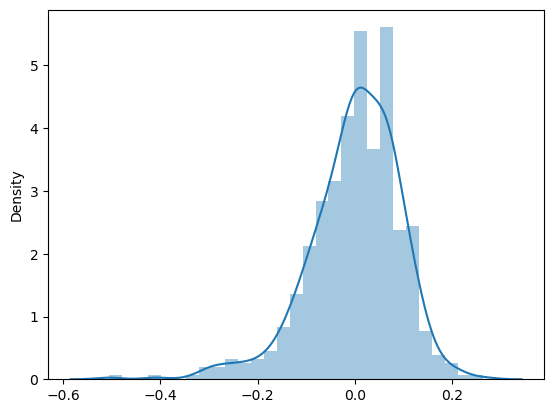

In [99]:
y_train_pred = lm7.predict(X_train_rfe)
res = y_train - y_train_pred
sns.distplot(res)

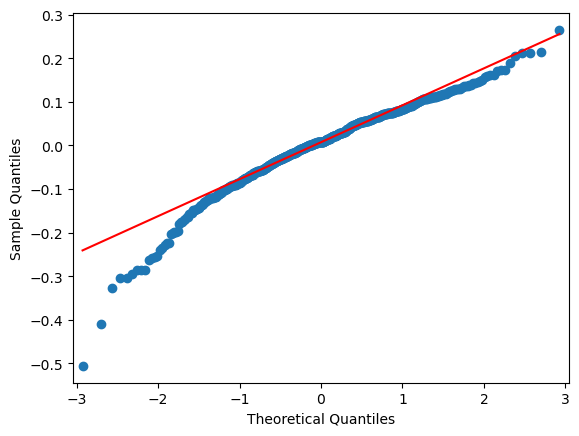

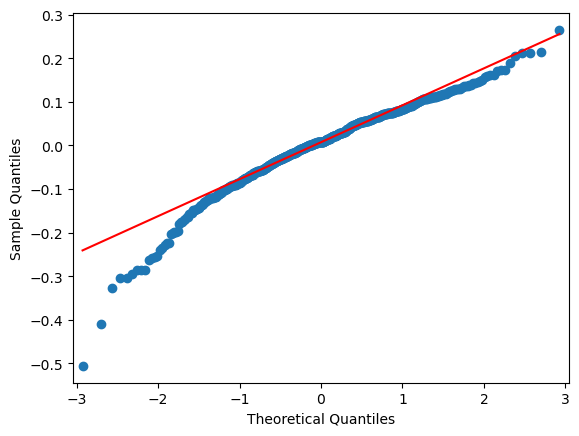

In [100]:
# Q-Q Plot : compare the residuals against normal distribution
sm.qqplot(res, line='q')

### Homoscedasticity : Equal distribution of residuals across predictor variables

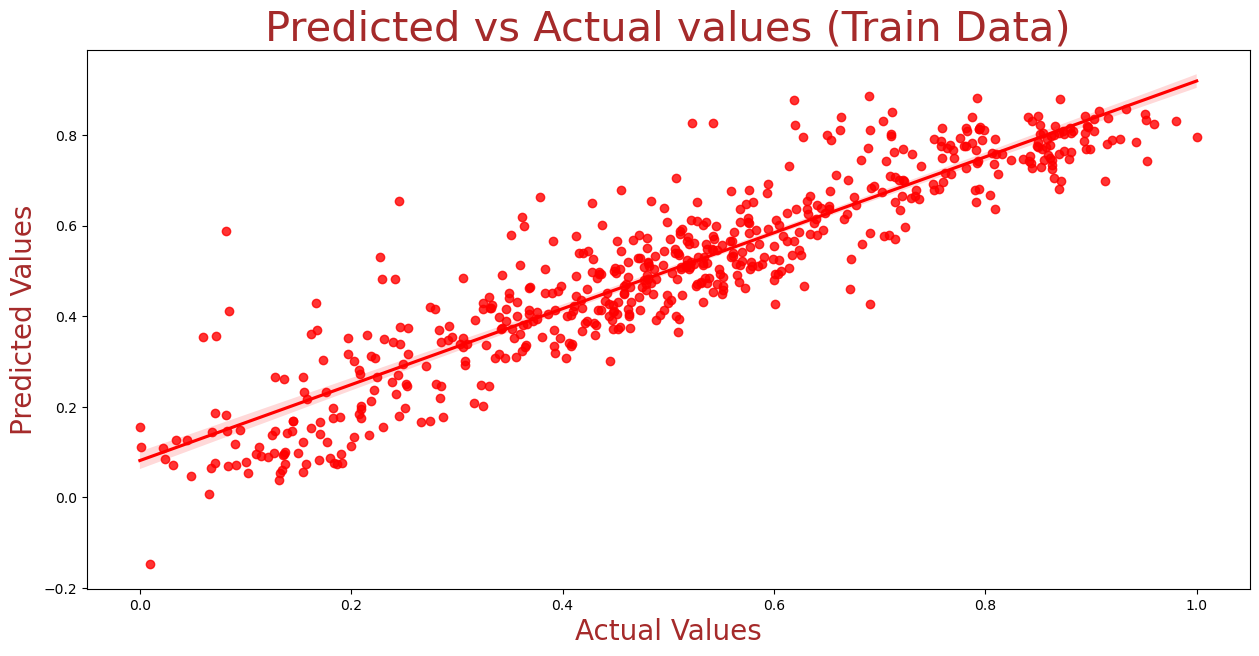

In [101]:
plt.figure(figsize = (15,7))
sns.regplot(x=y_train, y=y_train_pred, color='red')
plt.title ('Predicted vs Actual values (Train Data)' , fontsize=30, color='brown')
plt.xlabel("Actual Values", fontsize=20, color='brown')
plt.ylabel("Predicted Values", fontsize=20, color='brown')
plt.show()

In [102]:
# Impressions: 

# Clearly the residuals seem to be equally distribted across the predicted value.
# Hence, there exists an equal variance of residuals and we can be sure that there isn't any ambiguity or presence 
# of high or low concentrated regions.

### Looking Patterns in the residuals

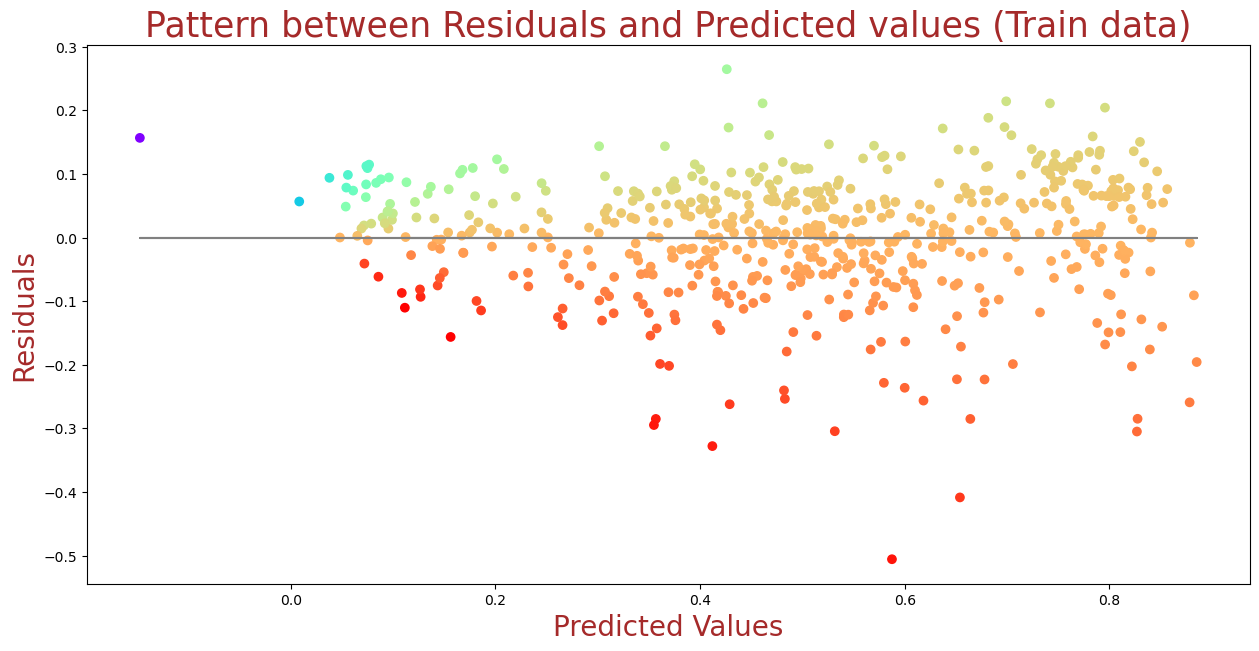

In [103]:
#test data
plt.figure(figsize = (15,7))

cmap=plt.cm.rainbow
#sns.regplot(x=y_pred, y=residual, color='orange')
x = y_train_pred
y = res
plt.scatter(x, y, c= np.arctan2(x,y), cmap=cmap ,alpha = 1)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='grey')
plt.title ('Pattern between Residuals and Predicted values (Train data)' , fontsize=25, color= 'brown')
plt.xlabel("Predicted Values", fontsize=20, color= 'brown')
plt.ylabel("Residuals", fontsize=20, color= 'brown')
plt.show()

In [104]:
# Impressions:

# Clearly we don't see any pattern here as expected from our model. 
# There is no specific relation between the residuals and predicted values

## Step 5: Predictions and Evaluation on the Test Set

In [105]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

In [106]:
bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [107]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light-Snow/Rain/Storm,Mist/Cloudy
358,0,0,0,0.268714,0.263697,0.594623,0.331845,0.039759,1,0,...,0,0,0,0,1,0,0,0,0,0
246,0,0,0,0.809978,0.769676,0.679234,0.460323,0.555022,0,0,...,0,1,0,0,1,0,0,0,0,0
622,1,0,0,0.684333,0.665240,0.344548,0.562988,1.019572,0,0,...,0,1,0,1,0,0,0,0,0,0
309,0,0,0,0.360361,0.371854,0.668793,0.174207,0.396110,0,0,...,0,0,0,0,1,0,0,0,0,0
518,1,0,0,0.677065,0.651150,0.332946,0.404356,0.887494,0,1,...,0,0,0,0,1,0,0,0,0,0


In [108]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light-Snow/Rain/Storm,Mist/Cloudy
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.554795,0.034247,0.650685,0.532468,0.504364,0.503861,0.429923,0.499146,0.260274,0.253425,...,0.061644,0.095890,0.123288,0.116438,0.198630,0.109589,0.130137,0.171233,0.047945,0.356164
std,0.498699,0.182488,0.478395,0.230854,0.217635,0.218260,0.207710,0.259679,0.440294,0.436469,...,0.241335,0.295454,0.329899,0.321854,0.400342,0.313452,0.337612,0.378009,0.214386,0.480513
min,0.000000,0.000000,0.000000,0.046591,0.025950,-0.353829,0.093308,-0.050345,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.347122,0.340982,0.358178,0.286147,0.279173,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529616,0.515640,0.500580,0.406692,0.507939,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.722754,0.678719,0.656902,0.533830,0.699255,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.970925,0.927898,0.940835,1.213032,1.019572,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
#setting up our target variable
y_test = bike_test.pop('cnt')

#setting up our test variables (features)
X_test= bike_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 358 to 472
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     146 non-null    int64  
 1   holiday                146 non-null    int64  
 2   workingday             146 non-null    int64  
 3   temp                   146 non-null    float64
 4   atemp                  146 non-null    float64
 5   hum                    146 non-null    float64
 6   windspeed              146 non-null    float64
 7   spring                 146 non-null    int32  
 8   summer                 146 non-null    int32  
 9   winter                 146 non-null    int32  
 10  Aug                    146 non-null    int32  
 11  Dec                    146 non-null    int32  
 12  Feb                    146 non-null    int32  
 13  Jan                    146 non-null    int32  
 14  July                   146 non-null    int32  
 15  June     

In [111]:
X_train_rfe.columns

Index(['const', 'yr', 'atemp', 'windspeed', 'spring', 'July', 'Oct', 'Sep',
       'Light-Snow/Rain/Storm', 'Mist/Cloudy'],
      dtype='object')

In [116]:
## picking all variables which are part of our final model (filteringour required variables)
#X_train_lm = sm.add_constant(X_train_new)
# col_final = X_train_rfe.columns
col_final = [col for col in X_train_rfe.columns if col != 'const']
col_final

['yr',
 'atemp',
 'windspeed',
 'spring',
 'July',
 'Oct',
 'Sep',
 'Light-Snow/Rain/Storm',
 'Mist/Cloudy']

In [117]:
#X_test = sm.add_constant(X_test)
X_test_new = X_test[col_final]
#X_test_new
#col_final = [col for col in X_train_rfe.columns if col != 'const']
#X_test_new = X_test[col_final]
X_test_new

,yr,atemp,windspeed,spring,July,Oct,Sep,Light-Snow/Rain/Storm,Mist/Cloudy
358,0,0.263697,0.331845,1,0,0,0,0,0
246,0,0.769676,0.460323,0,0,0,1,0,0
622,1,0.665240,0.562988,0,0,0,1,0,0
309,0,0.371854,0.174207,0,0,0,0,0,0
518,1,0.651150,0.404356,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
342,0,0.313027,0.150857,0,0,0,0,0,0
262,0,0.594817,0.281488,0,0,0,1,0,1
677,1,0.362738,0.480556,0,0,0,0,0,0
705,1,0.318824,0.270600,0,0,0,0,0,1


In [118]:
X_test_sm = sm.add_constant(X_test_new)

In [119]:
X_test_sm.head()

,const,yr,atemp,windspeed,spring,July,Oct,Sep,Light-Snow/Rain/Storm,Mist/Cloudy
358,1.0,0,0.263697,0.331845,1,0,0,0,0,0
246,1.0,0,0.769676,0.460323,0,0,0,1,0,0
622,1.0,1,0.665240,0.562988,0,0,0,1,0,0
309,1.0,0,0.371854,0.174207,0,0,0,0,0,0
518,1.0,1,0.651150,0.404356,0,0,0,0,0,0


In [121]:
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 358 to 472
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  146 non-null    float64
 1   yr                     146 non-null    int64  
 2   atemp                  146 non-null    float64
 3   windspeed              146 non-null    float64
 4   spring                 146 non-null    int32  
 5   July                   146 non-null    int32  
 6   Oct                    146 non-null    int32  
 7   Sep                    146 non-null    int32  
 8   Light-Snow/Rain/Storm  146 non-null    int32  
 9   Mist/Cloudy            146 non-null    int32  
dtypes: float64(3), int32(6), int64(1)
memory usage: 9.1 KB


In [123]:
## make predictions based on final model
y_test_pred =  lm7.predict(X_test_sm)

### Residual Analysis

<Figure size 640x480 with 0 Axes>

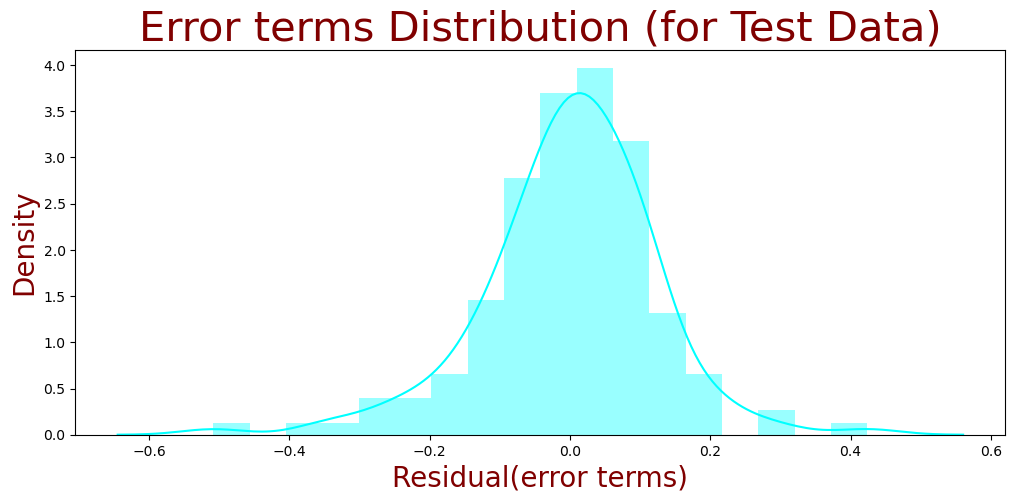

In [124]:
#plotting hist plot to analyse residuals

residual = y_test - y_test_pred

fig= plt.figure()
plt.figure(figsize = (12,5))
sns.distplot((residual), bins = 18, color='cyan')
plt.title('Error terms Distribution (for Test Data)', fontsize=30,color='maroon')
plt.xlabel('Residual(error terms)', fontsize= 20,color='maroon')
plt.ylabel('Density', fontsize= 20,color='maroon')
plt.show()

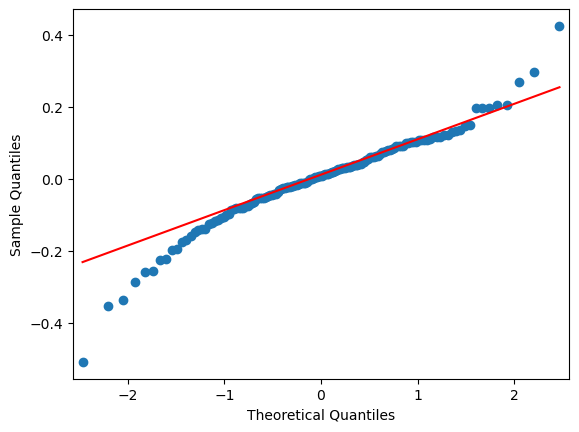

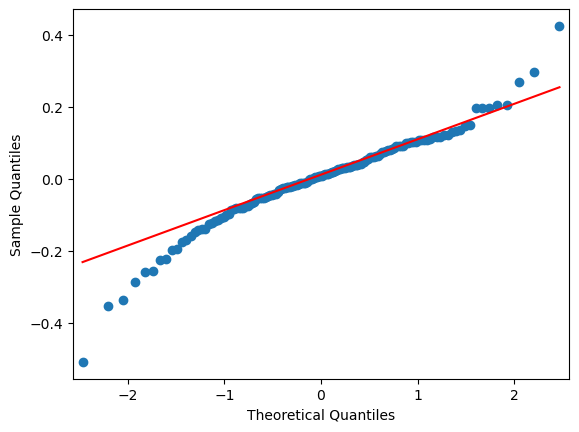

In [125]:
# Q-Q Plot : compare the residuals against normal distribution for Test data
residual = y_test - y_test_pred
sm.qqplot(residual, line='q')

In [129]:
# R-squared comparison for Test and Train
r2 = r2_score(y_test, y_test_pred)
r2

0.7746214006121177

In [130]:
# evaluate the adjusted R squared for test model
x_row = X_test.shape[0]

#number of predictors
pred = X_test.shape[1]

#applying adjusted R squared formula
adj_r2 = 1-(1-r2)*(x_row-1)/(x_row-pred-1)
adj_r2

0.7158269833804962

As per the final model (Model-7), the best fit equation is :

cnt = 0.2524 + ( 0.2540 * yr ) + ( 0.4313 * atemp) - ( 0.0799 * windspeed ) - ( 0.1575 * spring) - ( 0.0616 * July ) + ( 0.0734 * Oct ) + ( 0.0748 * Sep) - ( 0.2586 * Light-Snow/Rain/Storm ) - ( 0.0849 * Mist/Cloudy )

Feeling Temperature (atemp) It has coefficient value 0.4313. 
Hence, a unit increase in atemp will increase the number of hired bikes by 0.4313 units

Year (yr) : It has coefficient value 0.2540. Hence, a unit increase in yr will increase the number of hired bikes by 0.2540 units

Light-Snow/Rain/Storm : It has coefficient value -0.2586. 
Hence, a unit increase in_Light-Snow/Rain/Storm will decrease the number of hired bikes by -025860 unit

sn_spring : It has coefficient valu0.15751788. 
Hence, a unit increase in season_spring will decrease the number of hired bikes by15751788 units

## Conclusion:

1. The rental count is likely to increase with an increase in temperature. So they should start marketing heavily 
in regions that are higher in temperature and humidity

2. Rental count is likely to decrease in regions with light rain/snow weather patterns. Hence the company should 
not invest heavily in such regions as it will be an insignificant investment.

3. Fall season encounters a heavy rise in rental count. Hence the company should focus on regions with heavy rainfall
and specially during months October.

4. On the other hand, rental count is likely to decrease during Spring season. So company can offer
discounts or other offers that may enhance the numbers during Spring.

5. Rental count is likely to high with every passing year. Hence company must plan accordingly in advance on supply of
bikes per region.